In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
    
import sys 
sys.path.insert(0, '../src/')

import warnings; warnings.simplefilter('ignore')
import jsm_halopull
import jsm_SHMR
import jsm_mcmc_general

In [3]:
# def create_SAGA_MW(Nsamp, SHMR, fid_theta, datadir, min_mass):
#     sample = jsm_halopull.MassMat("../../data/MW-analog/meta_data_psi4/", Nsamp=Nsamp)
#     np.save(datadir+"lgMh_extra.npy", sample.acc_surv_lgMh_mat)
#     mass = jsm_mcmc.mock_data(fid_theta, SHMR, 0, datadir+"lgMh_extra.npy")
#     mass.get_stats(min_mass)
#     mass.save_data(datadir+"data.npy")

### new model complexity expirement!

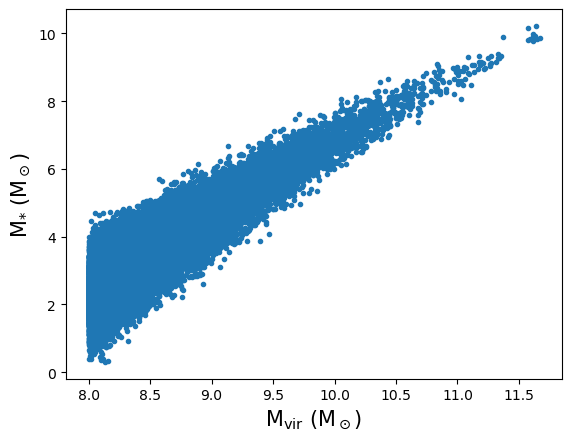

In [26]:
fid_theta = [1.8, -0.1, 10, 0.2, -0.1, 0.02]

well = jsm_mcmc_general.mock_data(jsm_SHMR.redshift_sigmaGrow, fid_theta, 89, "../../data/MW-analog/meta_data_psi4/", "../../data/paper/model_complexity/", read_red=True)
well.get_data_points()
well.save_data()

### creating the differnt Nsaga samples

In [ ]:
fid_theta = [1.95, -0.05, 0.25, 10]

In [ ]:
#10 hosts per sample

create_SAGA(10, "../../data/paper/N_hosts/10/", 6.5)

In [ ]:
#50 hosts per sample

create_SAGA(50, "../../data/paper/N_hosts/50/", 6.5)

In [ ]:
#100 hosts per sample

create_SAGA(100, "../../data/paper/N_hosts/100/", 6.5)

In [ ]:
#500 hosts per sample

create_SAGA(500, "../../data/paper/N_hosts/500/", 6.5)

In [ ]:
#1000 hosts per sample

create_SAGA(1000, "../../data/paper/N_hosts/1000/", 6.5)

### creating data for the min mass expirement

In [ ]:
create_SAGA(100, "../../data/paper/min_mass/4.5/", 4.5)

In [ ]:
create_SAGA(100, "../../data/paper/min_mass/5.0/", 5.0)

In [ ]:
create_SAGA(100, "../../data/paper/min_mass/5.5/", 5.5)

In [ ]:
create_SAGA(100, "../../data/paper/min_mass/6.0/", 6.0)

In [ ]:
#create_SAGA(100, "../../data/paper/min_mass/6.5/", 6.5) 
#using the same as above for comparison!